<a href="https://colab.research.google.com/github/harjeevansingh/Football_player_worth_prediction/blob/master/football_player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
# Loading Datasets
data = pd.read_csv("/content/drive/My Drive/productivity/datasets/football_players.csv")
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [4]:
output_var = 'market_value'

<h2> Exploring the dataset

In [5]:
X = data[data.columns[~data.columns.isin([output_var])]]
y = data[output_var]

from sklearn.model_selection import train_test_split
np.random.seed(13)  # setting seed
x_train, x_test = train_test_split(X, test_size=0.25)

y_train = y.loc[x_train.index.values]
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values,:]
x_test = X.loc[x_test.index.values,:]

In [6]:
df = pd.concat([x_train, y_train], axis=1)

In [7]:
df.shape

(345, 17)

In [8]:
df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
market_value    float64
dtype: object

In [9]:
df.describe(include='all')

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,345,345,345.000000,345,345.000000,345.000000,345.000000,345,345.000000,344.000000,345,345.000000,345.000000,345.00000,345.000000,345.000000,345.000000
unique,345,20,NaN,13,NaN,NaN,NaN,93,NaN,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN
top,Lucas Perez,Arsenal,NaN,CB,NaN,NaN,NaN,0.10%,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,22,NaN,68,NaN,NaN,NaN,53,NaN,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.805797,NaN,2.205797,758.057971,5.376812,NaN,55.255072,2.026163,NaN,0.026087,3.202899,10.53913,0.301449,0.150725,10.711739
std,NaN,NaN,3.944376,NaN,0.985931,954.080976,1.281027,NaN,51.857630,0.987922,NaN,0.159625,1.266515,5.71354,0.459554,0.358300,12.186980
min,NaN,NaN,17.000000,NaN,1.000000,3.000000,4.000000,NaN,0.000000,1.000000,NaN,0.000000,1.000000,1.00000,0.000000,0.000000,0.050000
25%,NaN,NaN,24.000000,NaN,1.000000,218.000000,4.500000,NaN,5.000000,1.000000,NaN,0.000000,2.000000,6.00000,0.000000,0.000000,3.000000
50%,NaN,NaN,27.000000,NaN,2.000000,454.000000,5.000000,NaN,50.000000,2.000000,NaN,0.000000,3.000000,10.00000,0.000000,0.000000,6.000000
75%,NaN,NaN,29.000000,NaN,3.000000,869.000000,5.500000,NaN,89.000000,2.000000,NaN,0.000000,4.000000,15.00000,1.000000,0.000000,15.000000


In [10]:
cat = [x for x in list(df.select_dtypes(exclude=['int', 'float']).columns)]
print("Categorical Features:")
for i in range(len(cat)):
  print(str(i+1)+". "+cat[i])

Categorical Features:
1. name
2. club
3. position
4. fpl_sel
5. nationality


In [11]:
num = [x for x in list(df.select_dtypes(include=['int', 'float']).columns)]
print("Numerical Features:")
for i in range(len(num)):
  print(str(i+1)+". "+num[i])

Numerical Features:
1. age
2. position_cat
3. page_views
4. fpl_value
5. fpl_points
6. region
7. new_foreign
8. age_cat
9. club_id
10. big_club
11. new_signing
12. market_value


<h2> I . Cleaning the data

In [12]:
# Filling the missing values
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
market_value    0
dtype: int64

In [13]:
df['region'] = df['region'].fillna(2.0)

In [14]:
df

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
275,Chris Smalling,Manchester+United,27,CB,3,834,5.5,1.30%,52,1.0,England,0,3,12,1,0,18.00
445,Cheikhou Kouyate,West+Ham,27,DM,2,284,5.0,0.10%,79,4.0,Senegal,0,3,20,0,0,12.00
435,Jonathan Leko,West+Brom,18,RW,1,169,4.5,0.20%,12,1.0,England,0,1,19,0,0,1.50
434,Hal Robson-Kanu,West+Brom,28,LW,1,766,5.0,0.70%,52,2.0,Wales,0,4,19,0,1,2.50
423,Ben Foster,West+Brom,34,GK,4,484,4.5,20.70%,113,1.0,England,0,6,19,0,0,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Loris Karius,Liverpool,24,GK,4,1255,5.0,0.20%,32,2.0,Germany,0,2,10,1,0,8.00
16,Kieran Gibbs,Arsenal,27,LB,3,489,5.0,0.50%,45,1.0,England,0,3,1,1,0,10.00
74,Tom Heaton,Burnley,31,GK,4,717,5.0,13.50%,149,1.0,England,0,4,4,0,0,4.00
176,Joe Lolley,Huddersfield,24,RW,1,63,4.5,0.10%,0,1.0,England,0,2,8,0,0,0.25


In [15]:
for i in df['fpl_sel'].index:
  df['fpl_sel'][i] = float(df['fpl_sel'][i][:-1])

df['fpl_sel'] = pd.to_numeric(df['fpl_sel'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
type(list(df['fpl_sel'].index))

list

In [17]:
type(df['fpl_sel'])

pandas.core.series.Series

In [18]:
df['fpl_sel']

275     1.3
445     0.1
435     0.2
434     0.7
423    20.7
       ... 
230     0.2
16      0.5
74     13.5
176     0.1
338     0.1
Name: fpl_sel, Length: 345, dtype: float64


<h2>II. Exploratory Data Analysis


<h3>(a). Univariate Analysis</h3>
The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the distribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.


1. Count plot - age

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


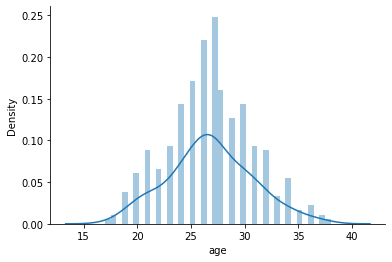

In [19]:
sns.distplot(df['age'], bins=40)
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


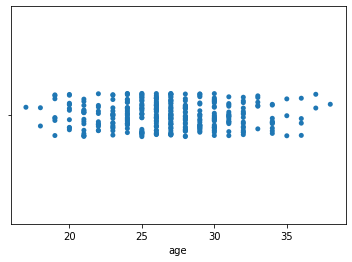

In [20]:
sns.stripplot(df['age'])

2. Count plot - club


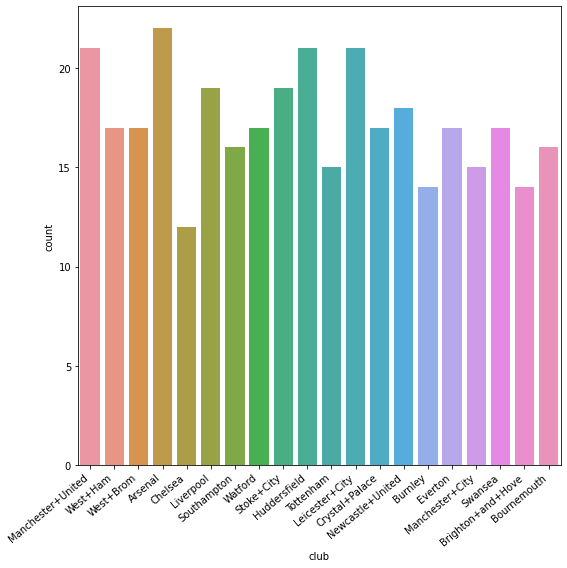

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(8,8))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='club', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

3. Count plot - position


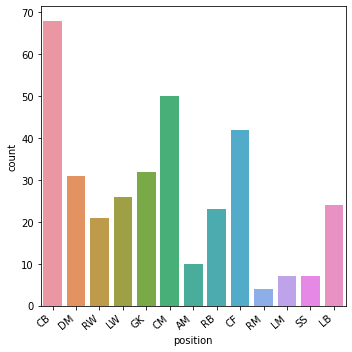

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(5,5))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='position', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

4. Count plot - position_cat


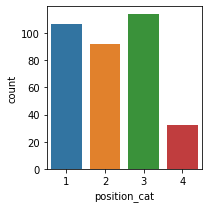

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(3,3))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='position_cat', data=df)
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
plt.show()
sns.despine()

5. Count plot - page_views


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


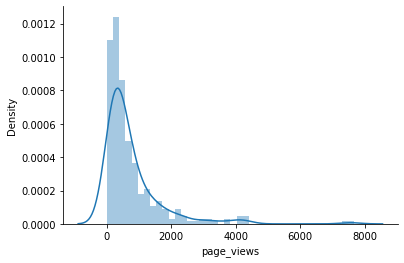

In [24]:
sns.distplot(df['page_views'], bins=40)
sns.despine()

Checking boxplot as there may be outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


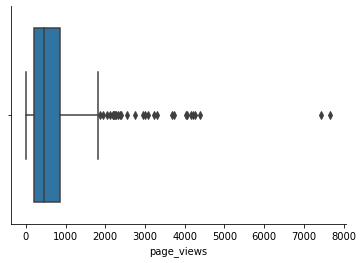

In [25]:
sns.boxplot(df["page_views"])
sns.despine()


/## Needs correction  in the inference

It can be seen that,

1.   The graph is skewed.
2.   There are outliers.




6. Count plot - fpl_value


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


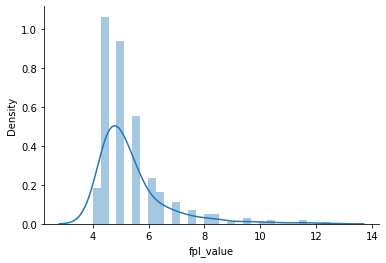

In [26]:
sns.distplot(df['fpl_value'])
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


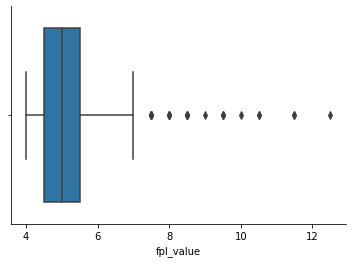

In [27]:
sns.boxplot(df["fpl_value"])
sns.despine()



1.   Skewed
2.   Outliers
3.   Most values between 4 to 6.



In [28]:
# checking one of the ouliers to get the idea of number of elements 
# with that specific outlier as a value
 
df[df["fpl_value"]==8]

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,market_value
271,Henrikh Mkhitaryan,Manchester+United,28,AM,1,3312,8.0,4.5,73,4.0,Armenia,0,4,12,1,1,35.0
263,Paul Pogba,Manchester+United,24,CM,2,7435,8.0,19.5,115,2.0,France,0,2,12,1,1,75.0
379,Son Heung-min,Tottenham,25,LW,1,2185,8.0,1.6,174,4.0,South Korea,0,3,17,1,0,30.0
113,Christian Benteke,Crystal+Palace,26,CF,1,1661,8.0,10.5,136,2.0,Belgium,0,3,6,0,1,28.0
244,David Silva,Manchester+City,31,AM,1,1434,8.0,3.3,130,2.0,Spain,0,4,11,1,0,30.0


7. Count plot - fpl_sel


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


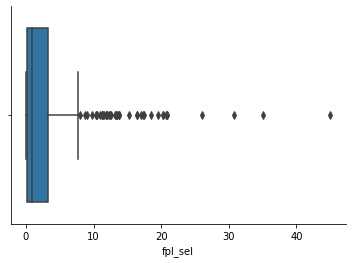

In [29]:
sns.boxplot(df['fpl_sel'])
sns.despine()

1. Highly skewed
2. Most values less than 5
3. Too many outliers

8. Count plot - fpl_points


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


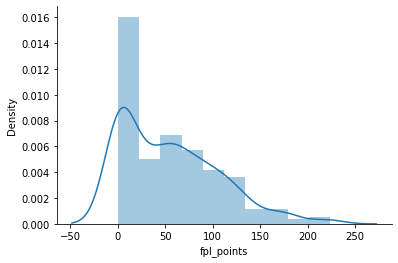

In [30]:
sns.distplot(df['fpl_points'])
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


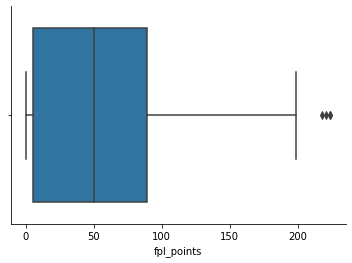

In [31]:
sns.boxplot(df['fpl_points'])
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


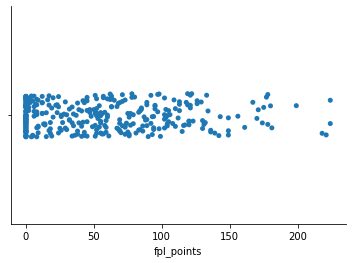

In [32]:
sns.stripplot(df['fpl_points'])
sns.despine()

1. Highly skewed
2. A few outliers

9. Count plot - region


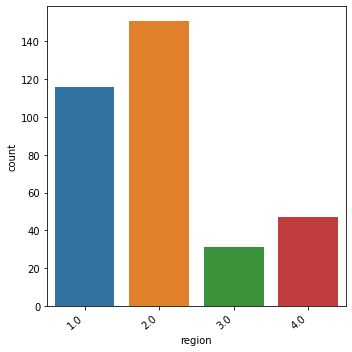

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(5,5))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='region', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

10. Count plot - nationality


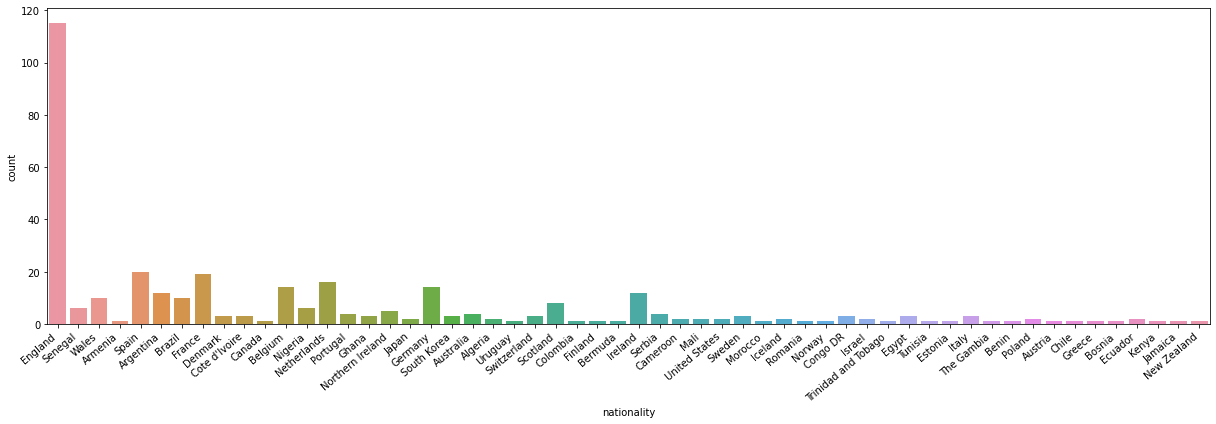

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(17,6))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='nationality', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

1. A huge number (more than 150) of players from England.
2. Number of players from most countries is less than 10.

11. Count plot - new_foreign


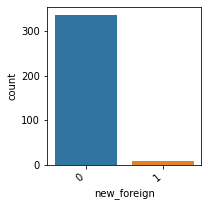

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(3,3))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='new_foreign', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

New foreign players is very very less as compared to those who are not.

12. Count plot - age_cat


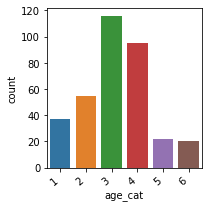

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(3,3))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='age_cat', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

13. Count plot - club_id

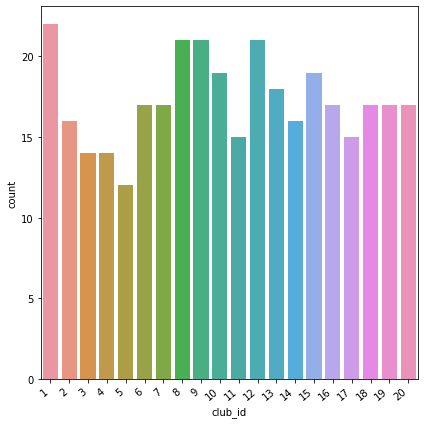

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(6,6))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='club_id', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

14. Count plot - big_club


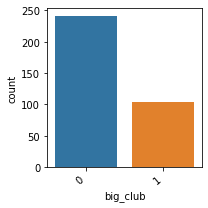

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(3,3))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='big_club', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

15. Count plot - new_signing 


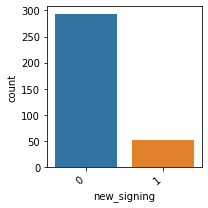

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(3,3))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='new_signing', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

16. Count plot - market_value  ( TARGET)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


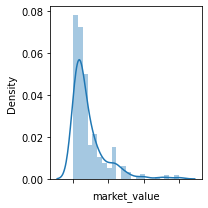

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize=(3,3))
#sns.countplot(x='Item_Type', data=df)

ax=sns.distplot(df['market_value'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


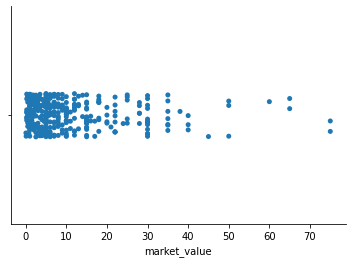

In [42]:
sns.stripplot(df['market_value'])
sns.despine()

- Very few player have value greater than 50.

Keeping inferences from the above plots we are going to perform the following tasks:
1. Dropping the club_id as it is an representative of the feature club_name and hence exact same effect on the value of target.
2. Also dropping the names as they don't do any help in predicting the target.

In [43]:
df.drop(['name', 'club_id'], axis=1, inplace=True)

Correlations

In [44]:
corr_columns = ['age', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'new_foreign', 'age_cat', 'big_club', 'new_signing', 'market_value']
df[corr_columns].corr()

,age,page_views,fpl_value,fpl_sel,fpl_points,new_foreign,age_cat,big_club,new_signing,market_value
age,1.000000,-0.059073,-0.087018,-0.022295,0.166209,-0.107356,0.971547,-0.099114,-0.086188,-0.103423
page_views,-0.059073,1.000000,0.722653,0.535867,0.517213,-0.059545,-0.060901,0.508150,0.151979,0.745774
fpl_value,-0.087018,0.722653,1.000000,0.521055,0.655639,0.008653,-0.080407,0.401513,0.100738,0.776165
fpl_sel,-0.022295,0.535867,0.521055,1.000000,0.550353,0.022216,-0.038964,0.275198,-0.018096,0.566497
fpl_points,0.166209,0.517213,0.655639,0.550353,1.000000,-0.174639,0.148899,0.305620,0.077559,0.653440
new_foreign,-0.107356,-0.059545,0.008653,0.022216,-0.174639,1.000000,-0.098152,0.051000,-0.068948,0.016578
age_cat,0.971547,-0.060901,-0.080407,-0.038964,0.148899,-0.098152,1.000000,-0.095403,-0.073994,-0.097393
big_club,-0.099114,0.508150,0.401513,0.275198,0.305620,0.051000,-0.095403,1.000000,0.076350,0.575174
new_signing,-0.086188,0.151979,0.100738,-0.018096,0.077559,-0.068948,-0.073994,0.076350,1.000000,0.146487
market_value,-0.103423,0.745774,0.776165,0.566497,0.653440,0.016578,-0.097393,0.575174,0.146487,1.000000


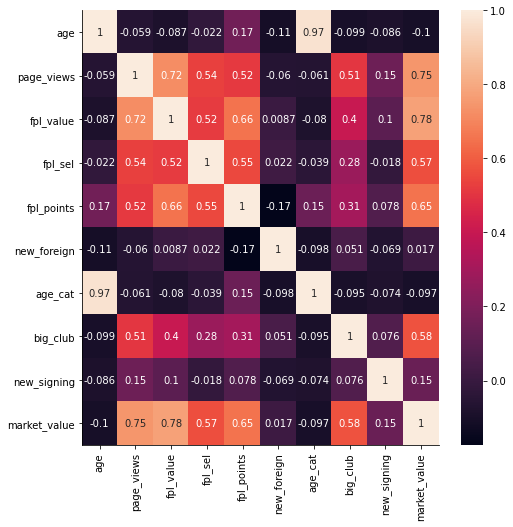

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(df[corr_columns].corr(),annot=True)
sns.despine()

* Dropping age_cat because of high correlation with age, also age_cat is the 
categorized feature for age.  ( PENDING DROP)
* Features with high correlation with market_value -
    * page_views
    * fpl_value
    * fpl_points.
* Features with very low correlation with market_value -
    * new_foreign.


<h3>(b) Bivariate Analysis</h3>

1. market_value and page_views

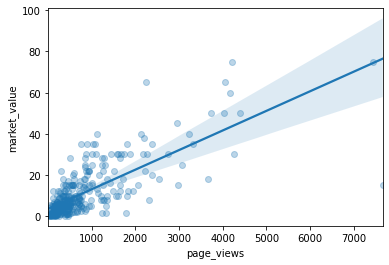

In [46]:
sns.regplot(x='page_views', y='market_value', data=df,scatter_kws={'alpha':0.3})

2. market_value and fpl_value

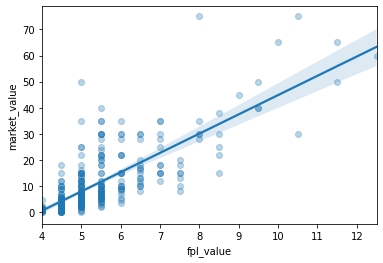

In [47]:
sns.regplot(x='fpl_value', y='market_value', data=df,scatter_kws={'alpha':0.3})

Changing categorical features by one hot encoding